# Project 2

Long Nguyen


217488651

## Cleaning Data

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # for plotting facilities
import seaborn as sns; 
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore")

customers = pd.read_csv('Wholesale customers data.csv')
customers.shape

(440, 8)

In [76]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

 ==> There is no null value in the dataset. 

### Implement Feature Scaling

In [77]:
customers_1 = customers.copy()

In [78]:
from sklearn.preprocessing import StandardScaler

standardScale = StandardScaler().fit_transform(customers_1)

scaledFrame = pd.DataFrame(standardScale, columns = customers_1.columns)

scaledFrame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [79]:
scaledFrame.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


<AxesSubplot:ylabel='Density'>

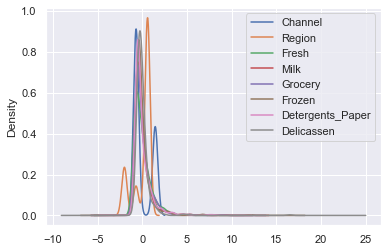

In [80]:
pd.DataFrame(scaledFrame).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

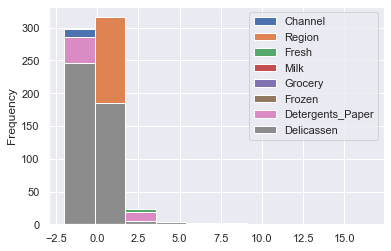

In [81]:
pd.DataFrame(scaledFrame).plot(kind='hist', bins=10)

### MinMax Scaler method

In [82]:
from sklearn.preprocessing import MinMaxScaler

min_max_scale = MinMaxScaler().fit_transform(customers)

scaledFrame2 = pd.DataFrame(min_max_scale, columns=customers.columns)

scaledFrame2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [83]:
scaledFrame2.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

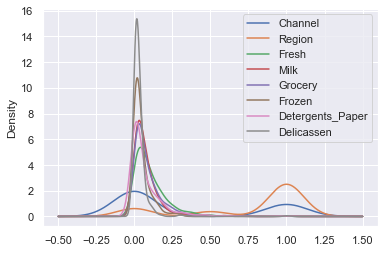

In [84]:
pd.DataFrame(scaledFrame2).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

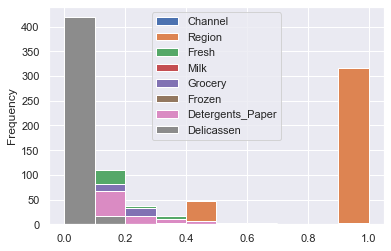

In [85]:
pd.DataFrame(scaledFrame2).plot(kind='hist', bins=10)

### Conclusion between the two methods

In Standard Scaler, the data is normally distributed. It also makes the data has the mean value of 0 and the standard deviation of 1. Meanwhile, in MinMaxScalar, the data ranges between -1 and 1.  

==> StandardScaler is used in the next steps.

Region and Channel are non categorical values, so I think it is unnecessary to have the values in the dataset. 

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

<Figure size 720x576 with 0 Axes>

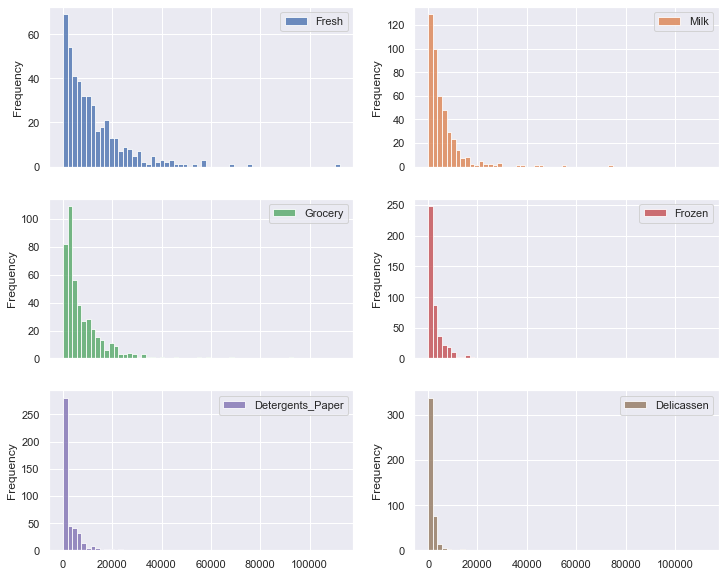

In [86]:
customers1 = customers.drop(['Channel','Region'], axis=1)

# Plotting the histogram

plt.figure(figsize=(10,8))
customers1.plot(kind='hist', alpha=0.8,bins=60, subplots=True,layout=(3,2),legend=True,figsize=(12,10))

==> There is a clear decline in the trend of products.


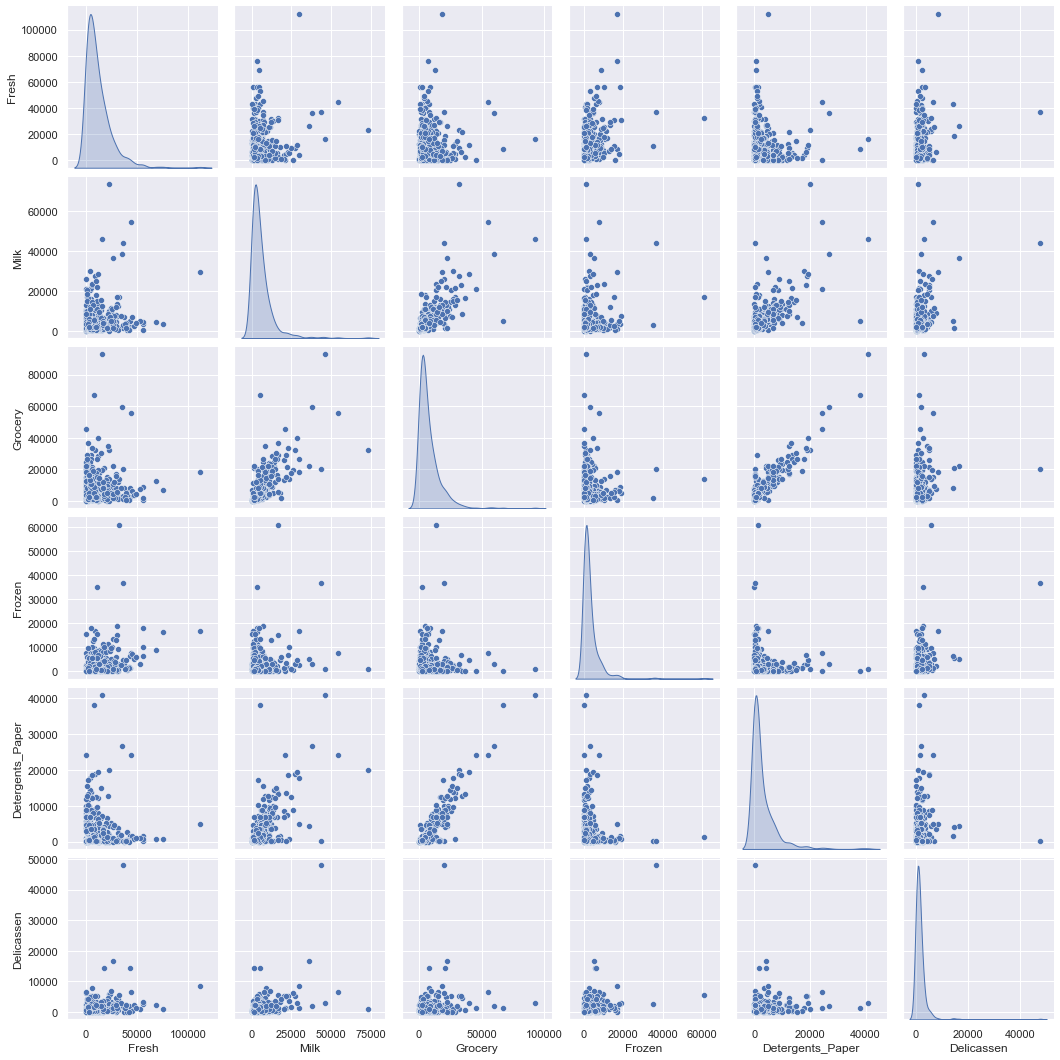

In [87]:
plot1=sns.pairplot(customers1, diag_kind='kde')

In [88]:
mean_customers = customers1.describe().loc['mean',:]
mean_customers

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Name: mean, dtype: float64

In [89]:
x = scaledFrame.drop(['Channel'], axis=1)
y = customers['Channel']

y[y == 2] = 0
y[y == 1] = 1

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

lr = LinearRegression()
knc = KNeighborsClassifier()

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=1)

In [92]:
print("LR:", lr.fit(X_train, Y_train).score(X_test, Y_test))
print("KNC: ", knc.fit(X_train, Y_train).score(X_test, Y_test))
print("GBC: ", GradientBoostingClassifier().fit(X_train, Y_train).score(X_test, Y_test))
print("RFC: ", RandomForestClassifier().fit(X_train, Y_train).score(X_test, Y_test))

LR: 0.26124123681110134
KNC:  0.9
GBC:  0.9090909090909091
RFC:  0.9


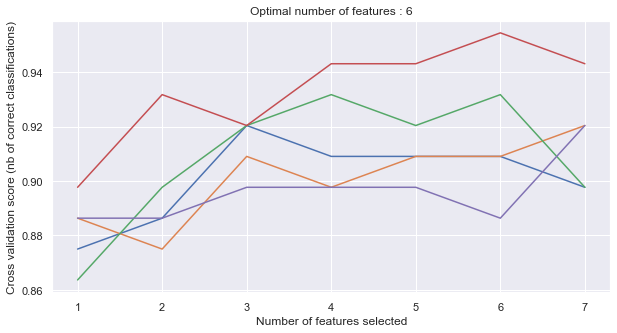

In [94]:
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf)
rfecv.fit(x, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

The graph changes every time I run, so the plot & the optimal number of features changes.

In [95]:
model = GradientBoostingClassifier()
rfecv = RFECV(estimator=GradientBoostingClassifier())

### KMeans Clustering

In [99]:
from sklearn.cluster import KMeans

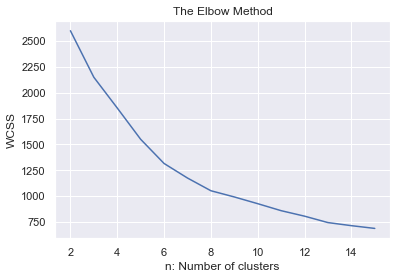

In [101]:
wcss = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaledFrame) # Standard scaler 
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

plt.plot(range(2, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('n: Number of clusters')
plt.ylabel('WCSS')
plt.show()

There is a clear sharp elbow at n = 6 ==> the most optimal number of clusters is 6

In [104]:
kmeans = KMeans(n_clusters = 6,random_state = 111)
y_means = kmeans.fit(scaledFrame)

y_means

KMeans(n_clusters=6, random_state=111)

### Implement PCA

In [105]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=400, n_init=100, random_state=0)
y_means = kmeans.fit(scaledFrame)

In [108]:
pca2 = PCA(n_components=2).fit(scaledFrame)
pca2d = pca2.transform(scaledFrame)

print("Explained variance is:",pca2.explained_variance_)
print("Explained variance ratio",pca2.explained_variance_ratio_)

Explained variance is: [3.10707136 1.79404441]
Explained variance ratio [0.38750123 0.22374588]


Principal Component 1 takes up 38.75% & Principal Component 2 takes up 22.375%.

Explained variance is: [3.10707136 1.79404441 1.0140786  0.74007428]
Explained variance ratio is: [0.38750123 0.22374588 0.12647173 0.09229904]


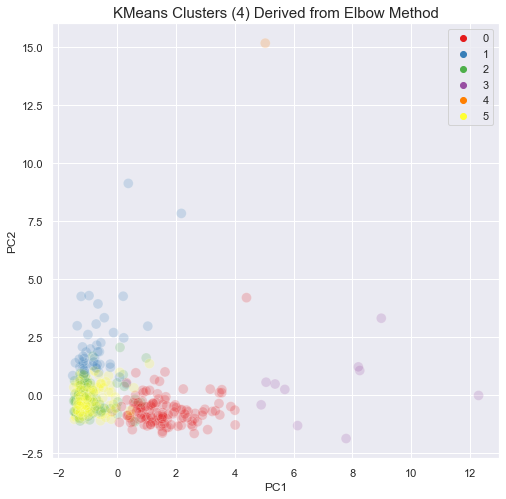

In [109]:
pca4 = PCA(n_components=4).fit(scaledFrame)
pca4d = pca4.transform(scaledFrame)

print("Explained variance is:",pca4.explained_variance_)
print("Explained variance ratio is:",pca4.explained_variance_ratio_)

plt.figure(figsize = (8,8))
sns.scatterplot(pca4d[:,0], pca4d[:,1], 
                hue=y_means.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Elbow Method', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

We can clearly see from the graph & the explained variance ratio output that:

- Principal Component 1 takes up 38.75%.
- Principal Component 2 takes up 22.375%.
- Principal Component 3 takes up 12.647%.
- Principal Component 4 takes up 9.229%.

### XGBoost Classifier

In [117]:
x = customers.drop(['Channel'], axis = 1)

y = customers['Channel']


In [123]:
# Convert y labels to 0 and 1

y[y == 2] = 0

y[y == 1] = 1

In [124]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [121]:
model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [122]:
results = cross_val_score(model, x, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
Accuracy = results.mean()*100

Accuracy: 91.14% (2.08%)


In [125]:
model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [126]:
PW = cross_val_score(model, x, y, cv=kfold, scoring='precision_weighted')
Rscore = cross_val_score(model, x, y, cv=kfold, scoring='recall_weighted')

In [127]:
Recall = (round((Rscore.mean()*100),3))
Precision = (round((PW.mean()*100),3))

f1score=round(2*((Recall*Precision)/(Recall+Precision)),3)

In [128]:
print("Accuracy= %f, Recall=%f, Precision=%f, f1score=%f" % (Accuracy,Recall,Precision,f1score))

Accuracy= 91.136364, Recall=91.136000, Precision=91.824000, f1score=91.479000
